
## PRCP 1009 CELLPHONE PRICE PREDICTION

###### A mobile phone, cell phone, cellphone, or hand phone, sometimes shortened to simply mobile, cell or just phone, is a portable telephone that can make and receive calls over a radio frequency link while the user is moving within a telephone service area.The first handheld mobile phone was demonstrated by John F. Mitchell and Martin Cooper of Motorola in 1973, using a handset weighing c. 2 kilograms (4.4 lbs).In 1979, Nippon Telegraph and Telephone (NTT) launched the world's first cellular network in Japan. In 1983, the DynaTAC 8000x was the first commercially available handheld mobile phone. From 1983 to 2014, worldwide mobile phone subscriptions grew to over seven billion—enough to provide one for every person on Earth.In first quarter of 2016, the top smartphone developers worldwide were Samsung, Apple, and Huawei, and smartphone sales represented 78 percent of total mobile phone sales. For feature phones (or "dumbphones") as of 2016, the largest were Samsung, Nokia, and Alcatel. 


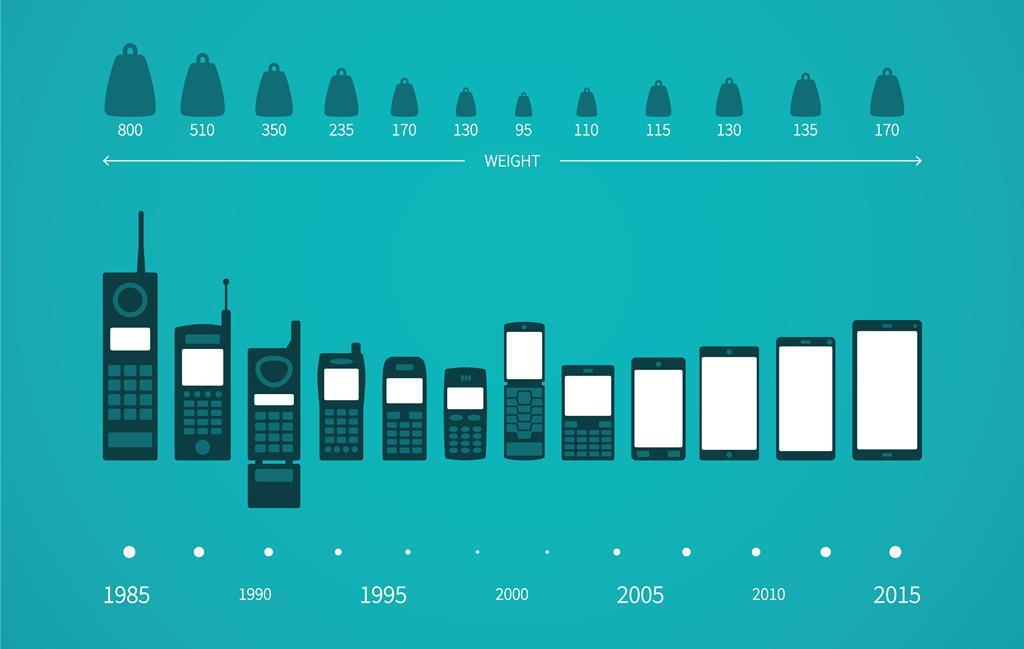

###### battery_power: Total energy a battery can store in one time measured in mAh

###### blue: Has bluetooth or not

###### clock_speed: speed at which microprocessor executes instructions

###### dual_sim: Has dual sim support or not

###### fc: Front Camera mega pixels

###### four_g: Has 4G or not

###### int_memory: Internal Memory in Gigabytes

###### m_dep: Mobile Depth in cm

###### mobile_wt: Weight of mobile phone

###### n_cores: Number of cores of processor

###### pc: Primary Camera mega pixels

###### px_height: Pixel Resolution Height

###### px_width: Pixel Resolution Width

###### ram: Random Access Memory in Mega Bytes

###### sc_h: Screen Height of mobile in cm

###### sc_w: Screen Width of mobile in cm

###### talk_time: longest time that a single battery charge will last when you are

###### three_g: Has 3G or not

###### touch_screen: Has touch screen or not

###### wifi: Has wifi or not

###### price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

   

###### Importing neecessary libraries and loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
df=pd.read_csv('cellphone.csv')
df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

### Basic checks of data

In [2]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [3]:
df.tail()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[5 rows x 21 columns]

### Information about data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Statistical Analysis of the data

In [5]:
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

## EDA (Exploratory Data Analysis)

### Univariate Analysis

In [6]:
import sweetviz as sv 
my_report = sv.analyze(df)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


###### Observations:
###### 1. In Battery_power, the maximum observation is 1998 and minimum is 501.According to 3 Std, the battery power above 1998 and below 501 are considered as outliers.
###### 2. Most of the mobiles have bluetooth as the feature i.e 1010 and only 990 mobiles does'nt have bluetooth as feature. It is almost half of the mobiles that does'nt have bluetooth.
###### 3. In clock_speed, the maximum observation is 3.00 and minimum is 0.50. According to 3 Std,clock_speed above 3.00 and below 0.50 are considered as outliers.
###### 4. Most of the mobiles have dual sim as the feature i.e 51% and 49% of mobiles does'nt have dual sim feature.
###### 5. In fc, the maximum observation is 19 and minimum is 0.0. According to 3 Std,fc above 19 and below 0.00 are considered as outliers.But,the minimum frequency cannot be 0, so there are outliers in this feature.
###### 6. Most of the mobiles have 4G as the feature i.e 52% and 48% of mobiles does'nt have 4G feature.
###### 7. In int_memory,the maximum observation is 64 and minimum is 2.0. According to 3 Std, above 64 and below 2.00 are considered as outliers.
###### 8. In mobile_depth, the maximum  depth observed is 16% and minimum is 5%.
###### 9. In mobile_weight, the maximum weight is 200 and minimum is 80. According to 3 Std,mobile_weight above 200 and below 80 are considered as outliers.
###### 10.In n_cores, the maximum observation is 14% and minimum is 12%. According to 3 Std, n_cores, above 14% and below 12% are considered as outliers.
###### 11.In pc i.e Primary camera mega pixels, the maximum observation is 20 and minimum is 0.0. According to 3 Std,pc above 20 and below 0.0 are considered as outliers but pc cannot be 0 as minimum value so there are chances of having outliers.
###### 12.In pixel_height, the maximum observation is 1960 and minimum is 0. According to 3 Std,pixel_height above 1960 and below 0.0 are considered as outliers.In this also, we can observe that pixel_height cannot be 0 hence presence of outliers.
###### 13.In pixel_width, the maximum observation is 1998 and minimum is 500. According to 3 Std,pixel_width above 1998 and below 500 are considered as outliers.
###### 14.In RAM , the maximum observation is 3998 and minimum is 256.According to 3 Std,  above 3998 and below 256 are considered as outliers.
###### 15.In sc_h(screen height) , the maximum observation is 19 and minimum is 5.According to 3 Std,  above 19 and below 5 are considered as outliers.
###### 16.In sc_w(screen_width) , the maximum observation is 18 and minimum is 0.According to 3 Std,  above 18 and below 0 are considered as outliers. But, screen_width cannot be 0. Hence, outliers are present.
###### 17.In talk_time , the maximum observation is 20 and minimum is 2.According to 3 Std,  above 20 and below 2 are considered as outliers.
###### 18.In 3G ,the maximum mobiles having this feature are 76%  and minimum is 24%.According to 3 Std,  above 76%(1523) and below 24% (477) are considered as outliers.
###### 19.In touch_screen ,the maximum mobiles having this feature are 50%  and minimum is 50% .According to 3 Std,  above 50%(1006) and below 50% (994) are considered as outliers.
###### 20.In WIFI ,the maximum mobiles having this feature are 51%  and minimum is 49%.According to 3 Std,  above 51%(1014) and below 49% (986) are considered as outliers.







## Bivariate Analysis

In [7]:
df1 = df[['battery_power','blue','clock_speed','dual_sim','fc','four_g' ,'int_memory' ,'m_dep','mobile_wt','n_cores','pc' ,'px_height','px_width','ram','sc_h','sc_w' ,'talk_time','three_g' ,'touch_screen','wifi']]

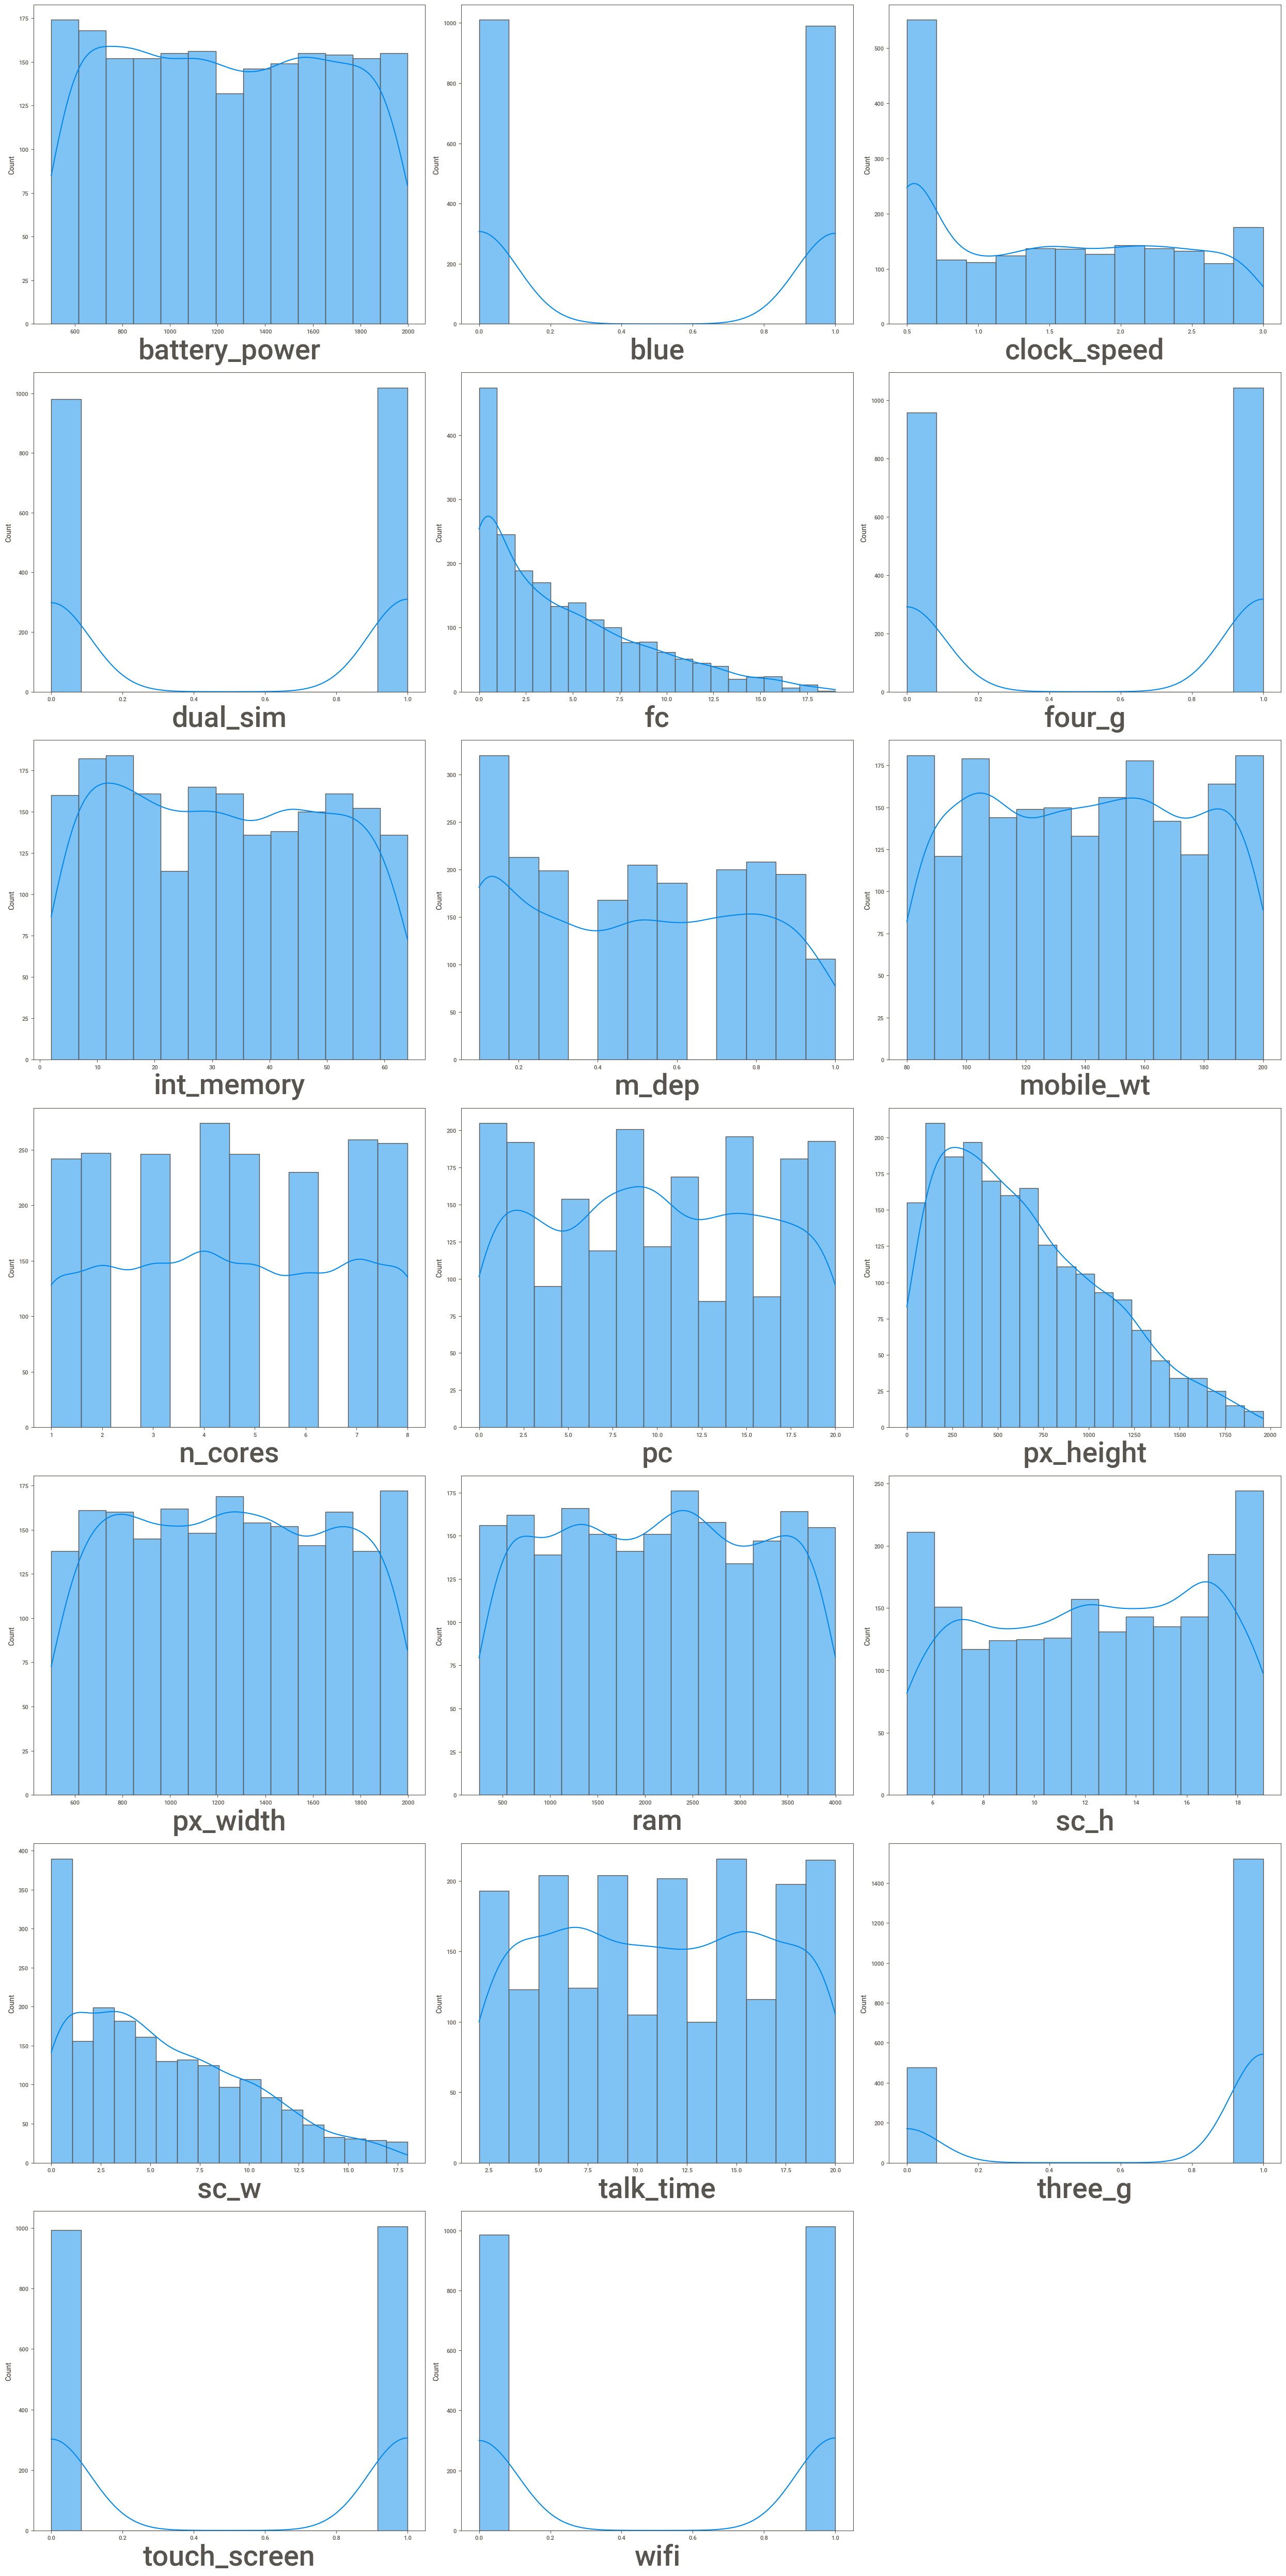

In [8]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df1:
    if plotnumber <= 21:
        ax = plt.subplot(7,3, plotnumber)
        sns.histplot(x = df[column],kde = True)
        plt.xlabel(column, fontsize = 40)
    plotnumber+=1
plt.tight_layout()

###### There seems to be skewness in some columns which needs to be handled

###### Visualizing Distribution of columns through distplots

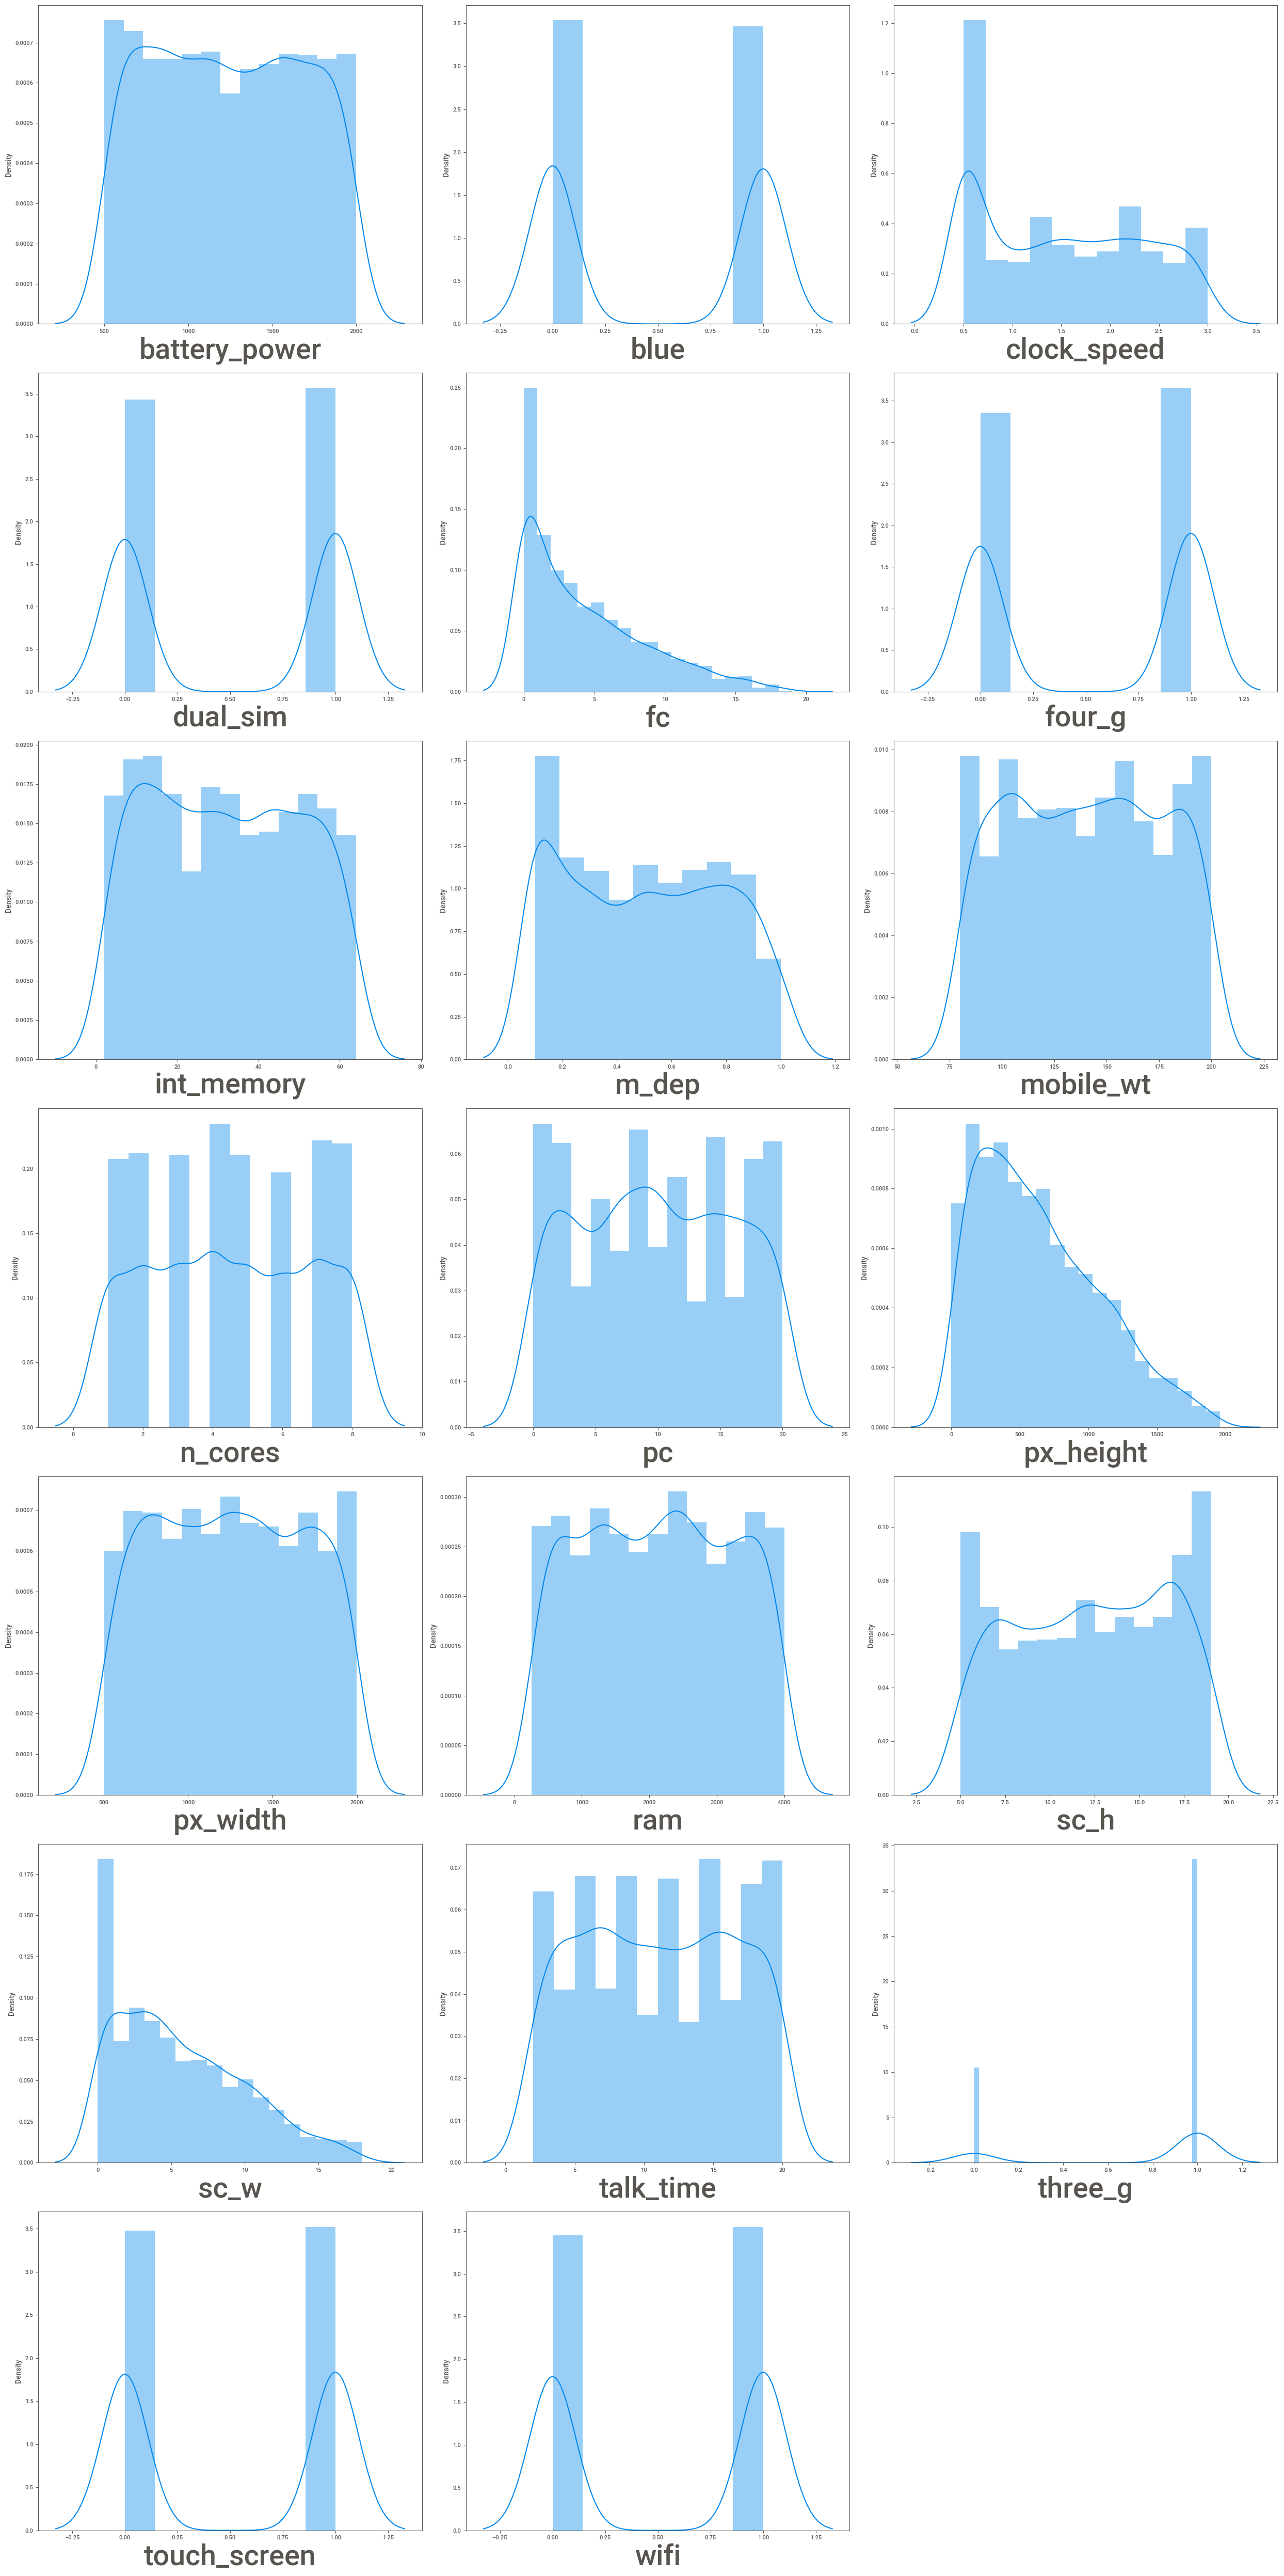

In [9]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df1:
    if plotnumber <= 21:
        ax = plt.subplot(7,3, plotnumber)
        sns.distplot(x = df[column])
        plt.xlabel(column, fontsize = 40)
    plotnumber+=1
plt.tight_layout()

#### Target column

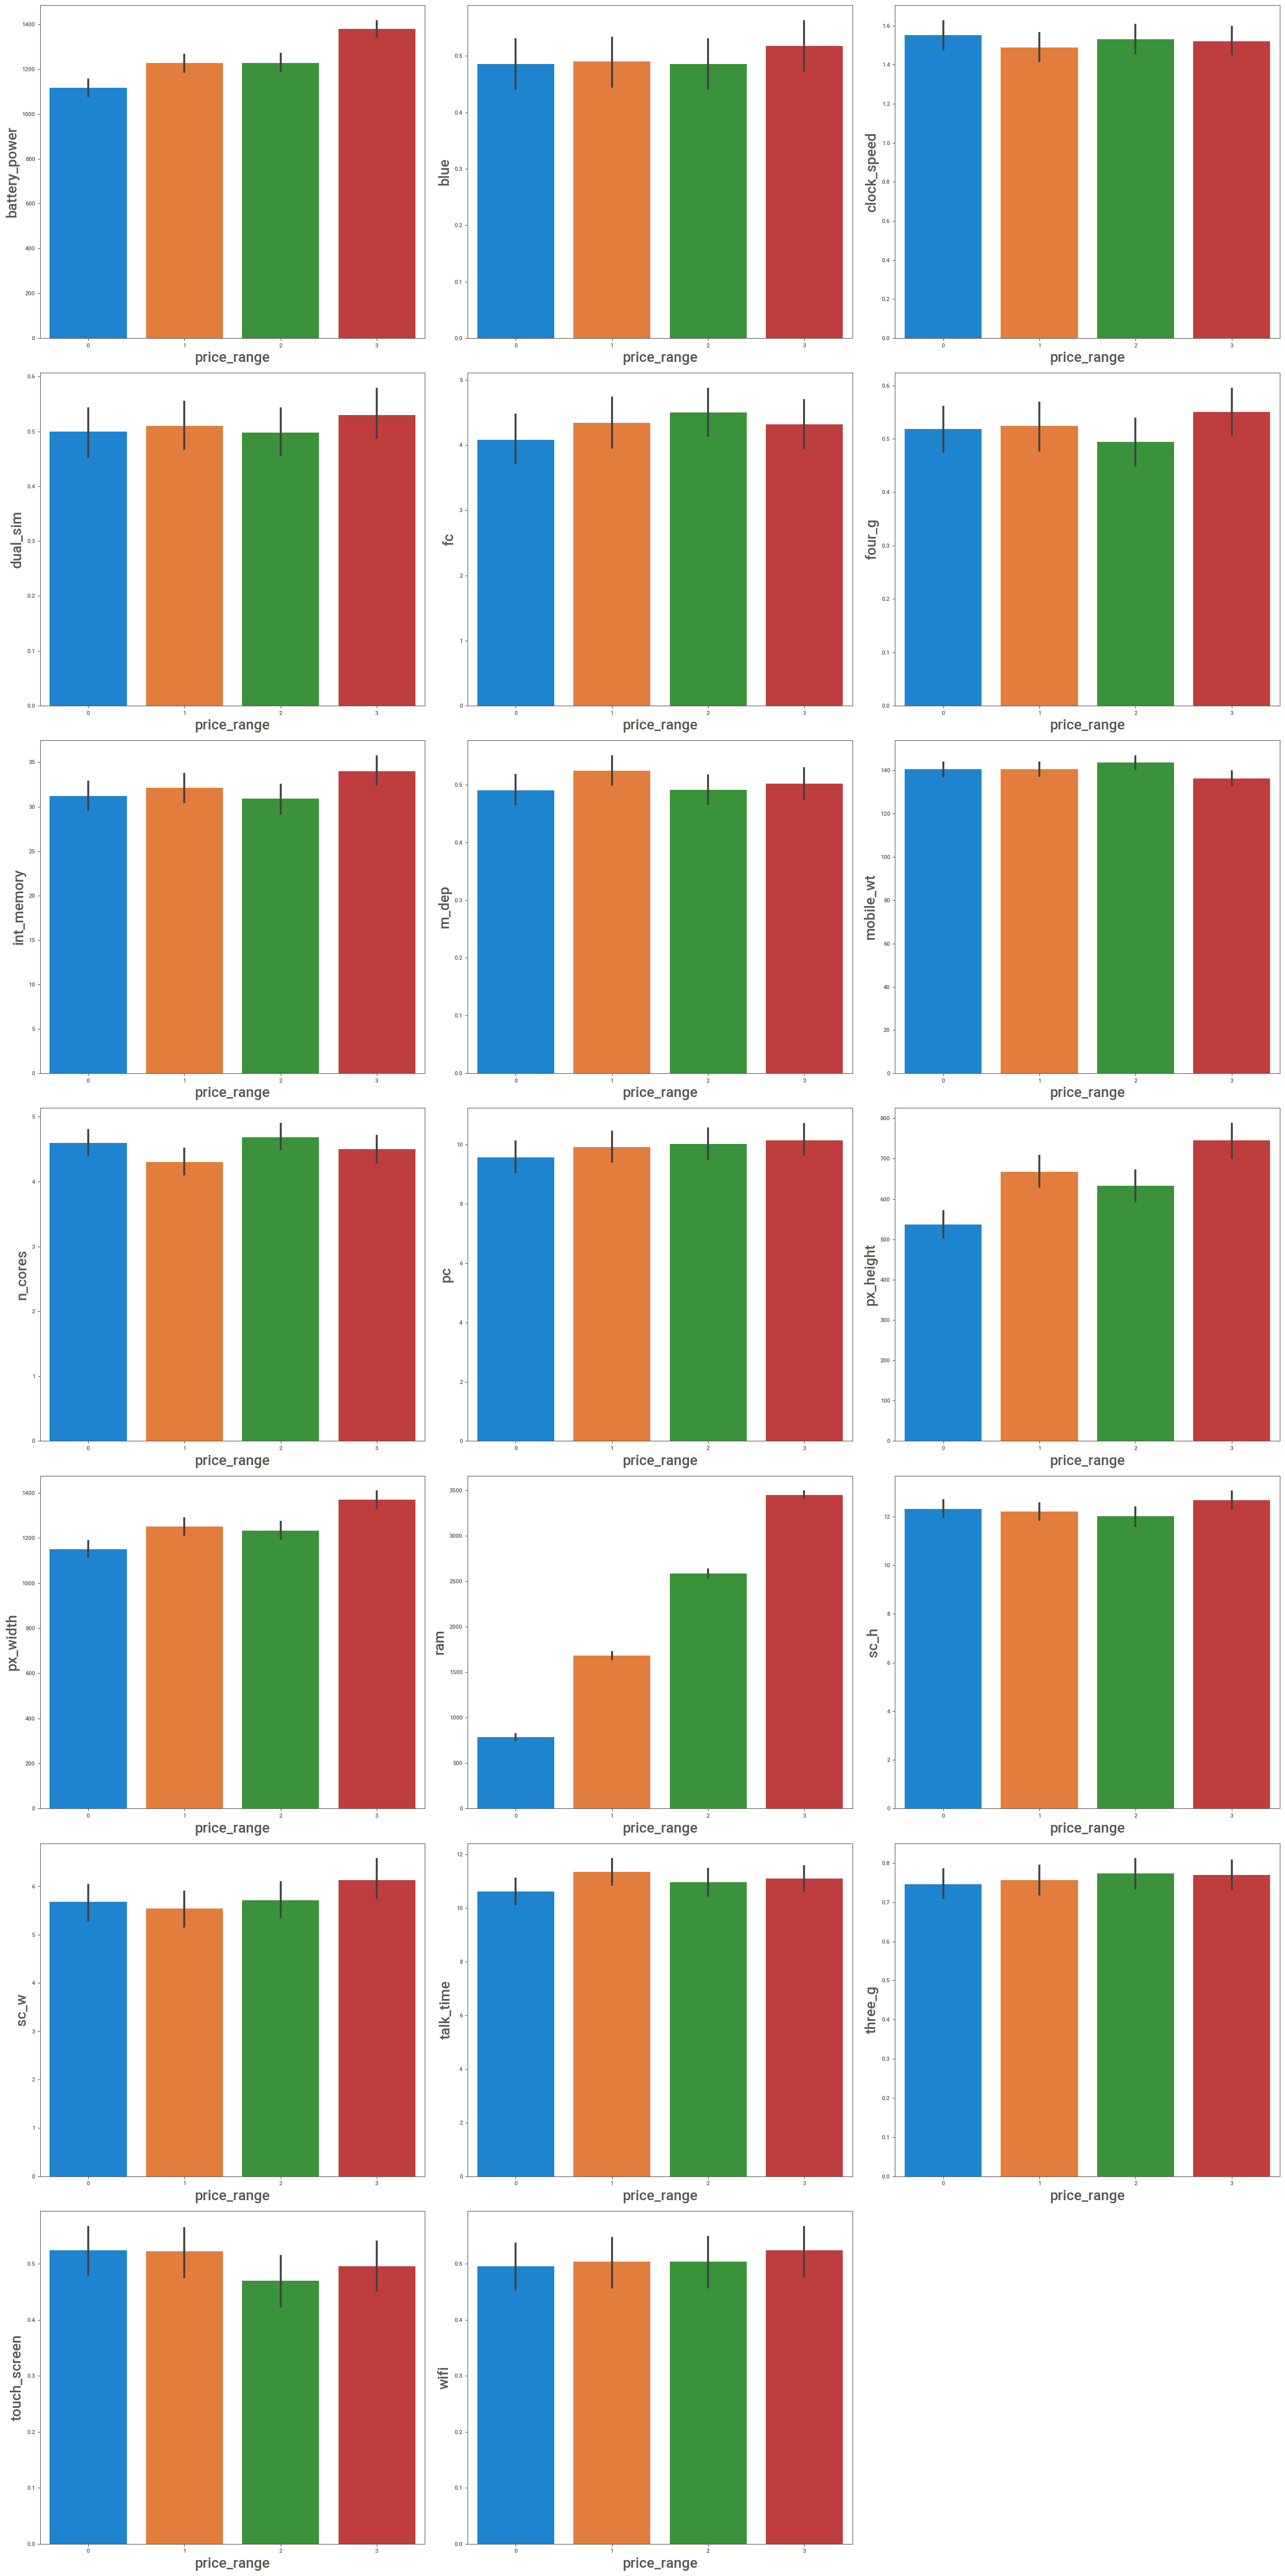

In [10]:
df2 = df[['battery_power','blue','clock_speed','dual_sim','fc','four_g' ,'int_memory' ,'m_dep','mobile_wt','n_cores','pc' ,'px_height','px_width','ram','sc_h','sc_w' ,'talk_time','three_g' ,'touch_screen','wifi']]
plt.figure(figsize=(25,50),facecolor='white')
plotnum=1
for c in df2:
    if(plotnum<21):
        ax=plt.subplot(7,3,plotnum)
        sns.barplot(x=df.price_range,y=df2[c])
        plt.xlabel('price_range',fontsize=20)
        plt.ylabel(c,fontsize=20)
        
    plotnum+=1
plt.tight_layout() 

# observation:

###### 1. The mobiles having highest price range are having more battery power.
###### 2. The mobiles having highest price range are having highest bluetooth more than 0.5 and the mobile phones having less price are not having bluetooth.
###### 3. The mobiles having highest price range are having dual sim than ones which are not having this feature.
###### 4. The clock frequency depends not only on the price but also on the mobiles. It can vary according to the requirements in our given dataset, but basically, it will increase as the price increases for faster execution of the user's choices.
###### 5. The mobiles having highest price range are having 4G feature. This has been quite common as price increases features get upgraded in mobiles.
###### 6. The mobiles having highest price range has more internal memory storage than mobiles of lesser amount.
###### 7. The depth of the mobile depends not only on the price range but also other features depending on the manufacturing of the mobiles by the brands based on customer's choice.
###### 8. The weight of mobile is slightly depending upon the price range feature.
###### 9. The mobiles having highest price are having less number of cores and vice versa depending on the brand and user's choice.
###### 10.The mobiles having highest price range are having primary camera mega mizels as the feature and vice versa.
###### 11. The mobiles having highest price range are having high pixel height and vice versa.
###### 12. The mobiles having highest price range are having more battery pixel width and vice versa.
###### 13. The mobiles having highest price range are having high RAM and vice versa.
###### 14. The mobiles having highest price range are having more screen height and vice versa.
###### 15. The mobiles having highest price range are having more screen width and vice versa.
###### 16. The mobiles having highest price range are having more talk_time and vice versa depending on the sim's.
###### 17. The mobiles having highest price range are having 3G and vice versa.
###### 18. The touch screen feature depends on the brands and price of the mobile.
###### 19. The mobiles having highest price range are having WiFi and vice versa.
###### 20. The mobiles having highest price range are having more screen height and vice versa.

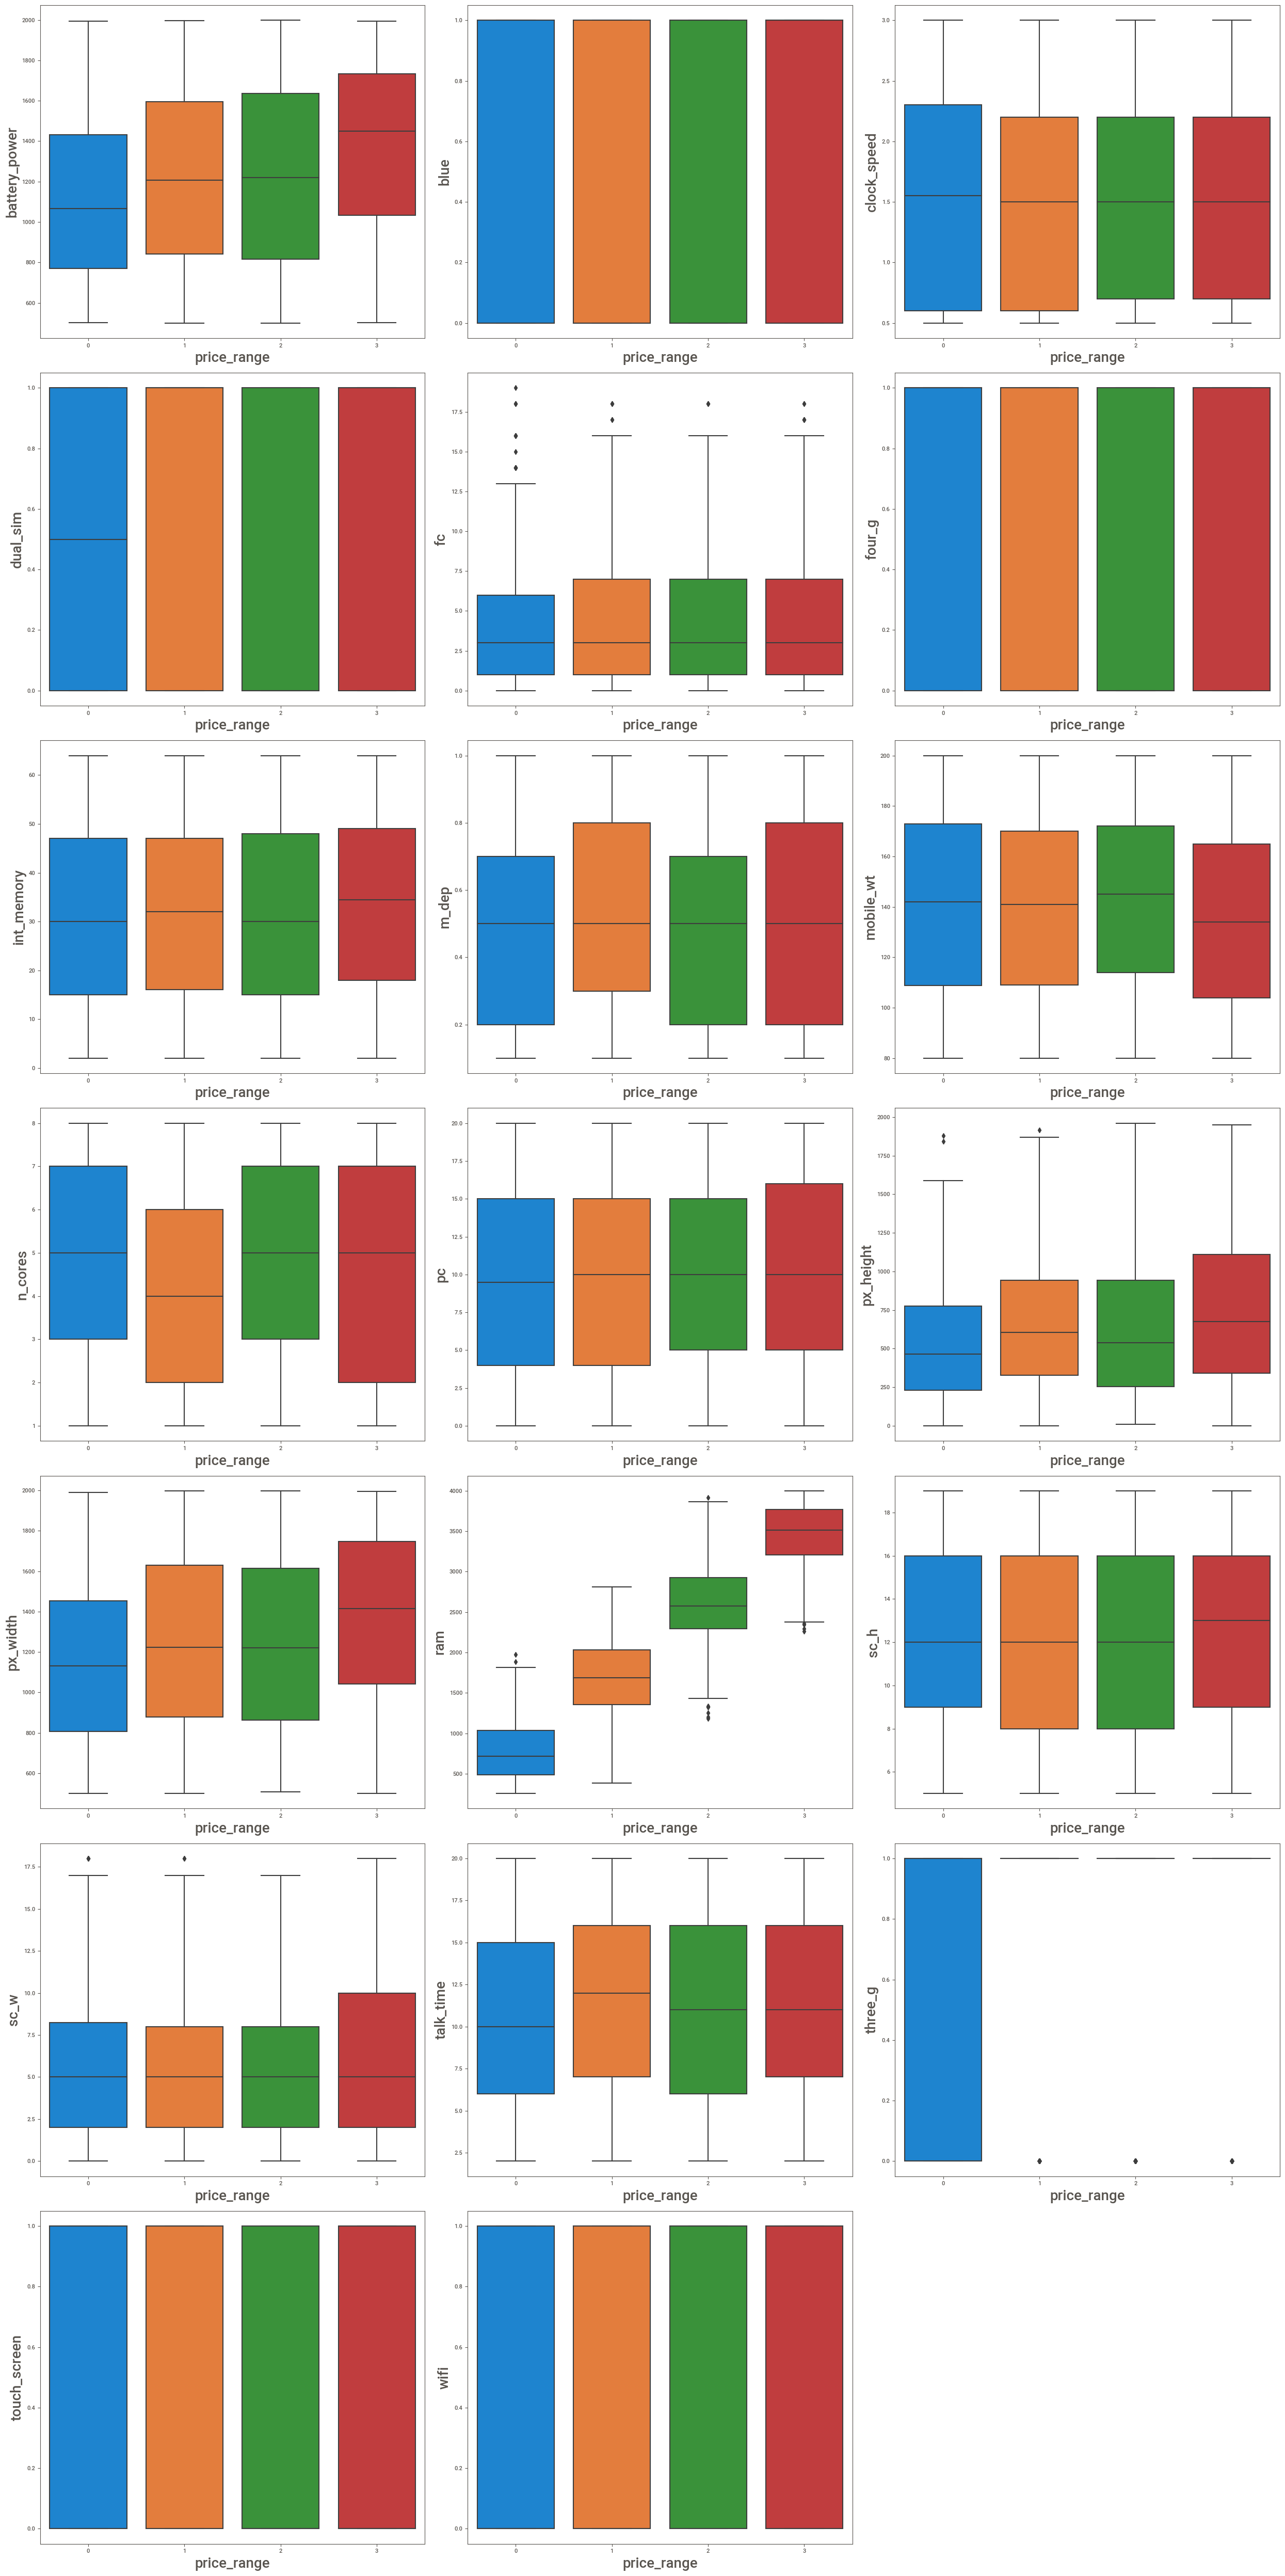

In [11]:
plt.figure(figsize=(25,50),facecolor='white')
plotnum=1
for c in df2:
    if(plotnum<21):
        ax=plt.subplot(7,3,plotnum)
        sns.boxplot(x=df.price_range,y=df2[c])
        plt.xlabel('price_range',fontsize=20)
        plt.ylabel(c,fontsize=20)
        
    plotnum+=1
plt.tight_layout() 

#### Observations:
######  The ouliers are present in clock frequency (fc), pixel height, and RAM


# Data Preprocessing

In [13]:
# checking the null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [14]:
df1 = df[['battery_power', 'clock_speed', 'fc', 
       'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]

##### Outlier Check

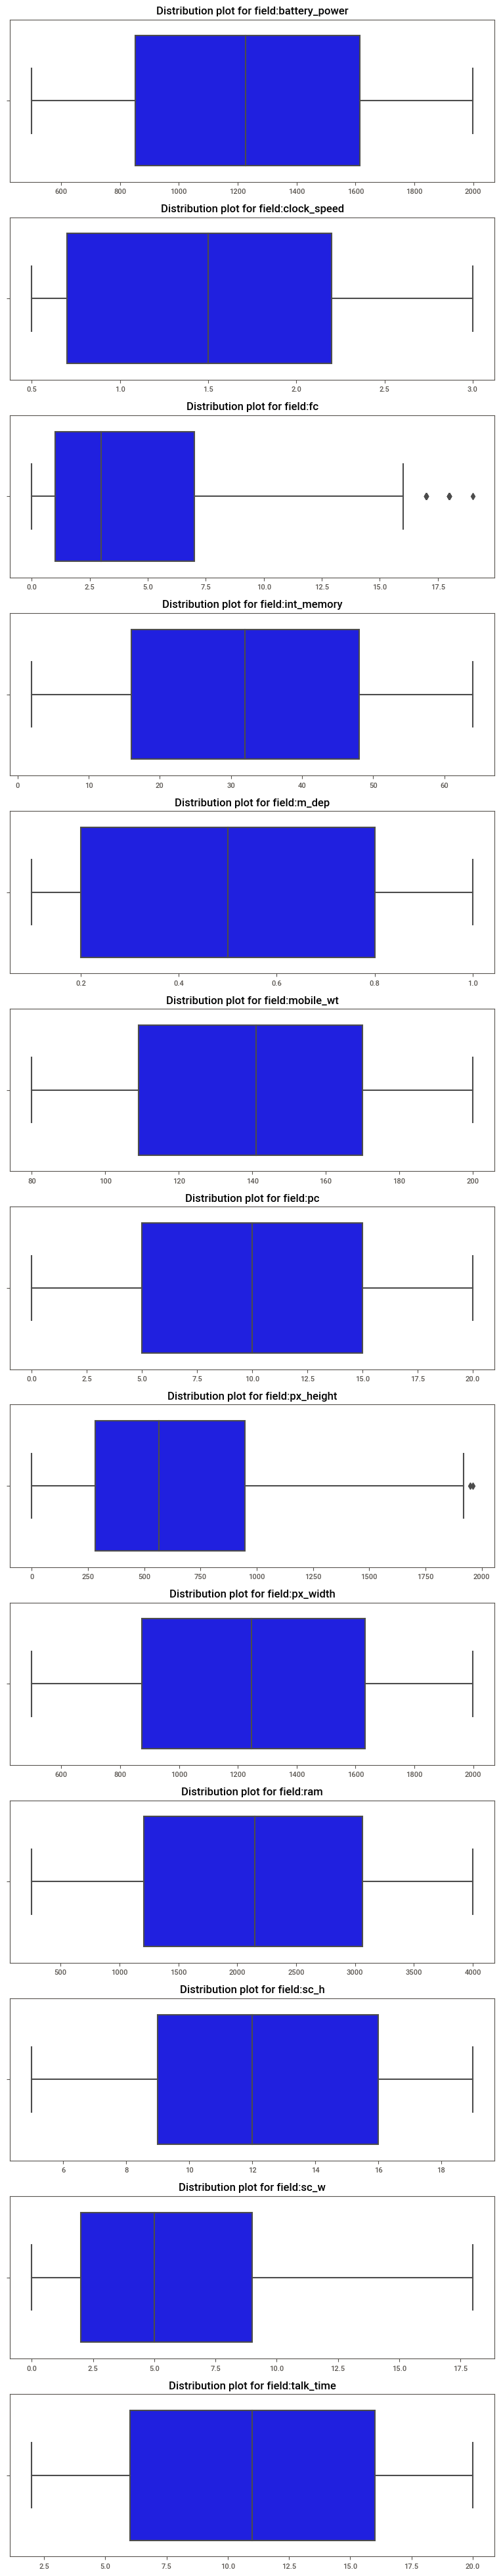

In [15]:

plt.figure(figsize=(15, 60))

for i, c in enumerate(df1.select_dtypes(include='number').columns):
    plt.subplot(20,2,i*2+1)
    sns.boxplot(df1[c], color='blue')
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

<AxesSubplot:xlabel='px_height'>

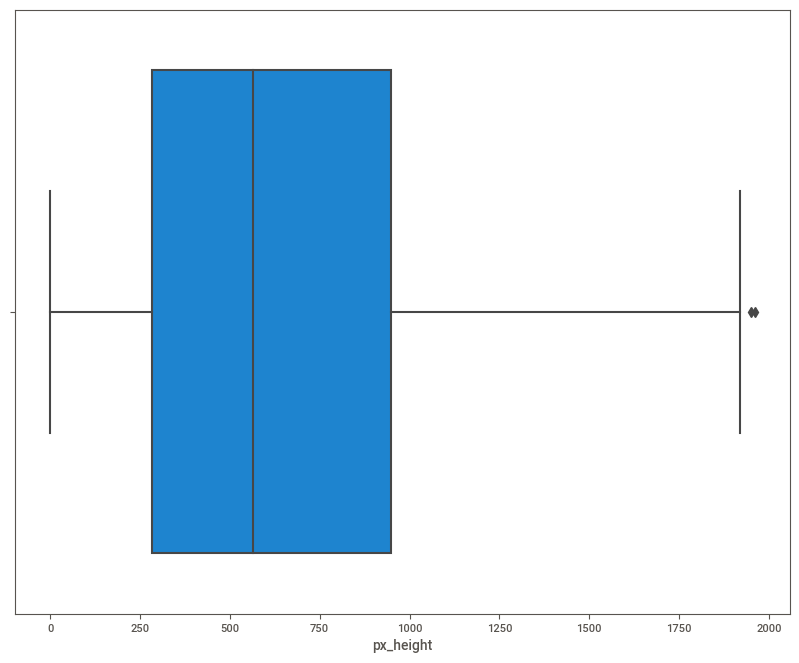

In [16]:
plt.figure(figsize = (10,8))
sns.boxplot(df.px_height)

In [17]:
IQR = stats.iqr(df.px_height, interpolation = 'midpoint')
IQR

665.0

In [18]:
Q1= df.px_height.quantile(0.25)

Q2= df.px_height.quantile(0.75)

min_limit= Q1 - 1.5*IQR

max_limit= Q2 + 1.5*IQR

In [19]:
df.loc[df.px_height > max_limit]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
988            1413     1          0.5         1   4       1          45   
1771           1230     1          1.6         0   0       1          48   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
988     0.4        104        5  ...       1949      1994  2973    17     8   
1771    0.7        111        7  ...       1960      1963  1622    18    17   

      talk_time  three_g  touch_screen  wifi  price_range  
988          15        1             0     1            3  
1771         16        1             1     1            2  

[2 rows x 21 columns]

In [20]:
df['px_height'] = df['px_height'].replace(0, df.px_height.mean())
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...       20.0       756  2549     9     7         19   
1        136        3  ...      905.0      1988  2631    17     3          7   
2        145        5  ...     1263.0      1716  2603    11     2          9   
3        131        6  ...     1216.0      1786  2769    16     8         11   
4        141        2  ...     1208.0      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [21]:
df.loc[df['px_height'] > max_limit,'px_height']=np.median(df.px_height)

In [22]:
df['sc_w'] = df['sc_w'].replace(0, df.sc_w.mean())
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...       20.0       756  2549     9   7.0         19   
1        136        3  ...      905.0      1988  2631    17   3.0          7   
2        145        5  ...     1263.0      1716  2603    11   2.0          9   
3        131        6  ...     1216.0      1786  2769    16   8.0         11   
4        141        2  ...     1208.0      1212  1411     8   2.0         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

<AxesSubplot:xlabel='fc'>

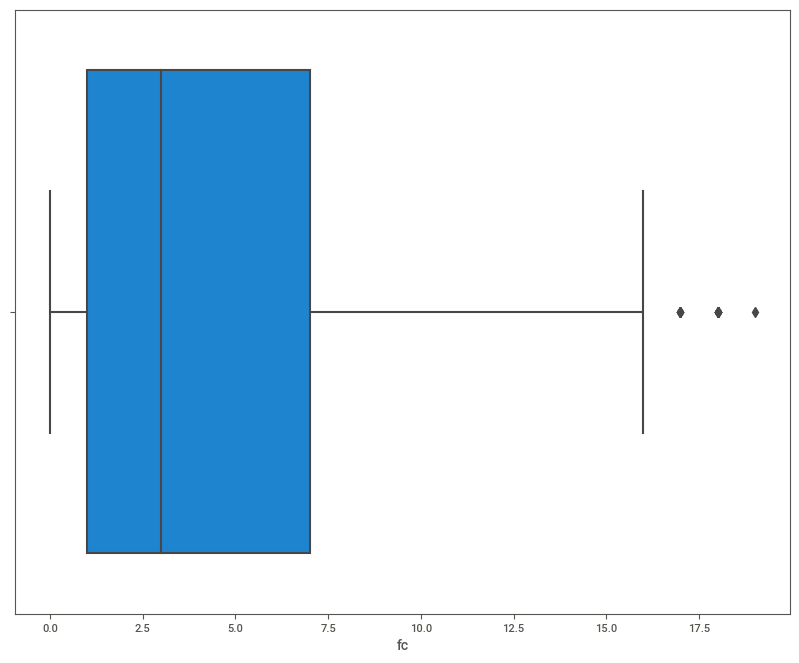

In [23]:
plt.figure(figsize = (10,8))
sns.boxplot(df.fc)

In [24]:
IQR = stats.iqr(df.fc, interpolation = 'midpoint')

In [25]:
Q1= df.fc.quantile(0.25)

Q2= df.fc.quantile(0.75)

min_limit= Q1 - 1.5*IQR

max_limit= Q2 + 1.5*IQR

In [26]:
df.loc[df['fc'] > max_limit,'fc']=np.median(df.fc)

In [27]:
df['sc_w'] = df['sc_w'].replace(0, df.sc_w.mean())
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...       20.0       756  2549     9   7.0         19   
1        136        3  ...      905.0      1988  2631    17   3.0          7   
2        145        5  ...     1263.0      1716  2603    11   2.0          9   
3        131        6  ...     1216.0      1786  2769    16   8.0         11   
4        141        2  ...     1208.0      1212  1411     8   2.0         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

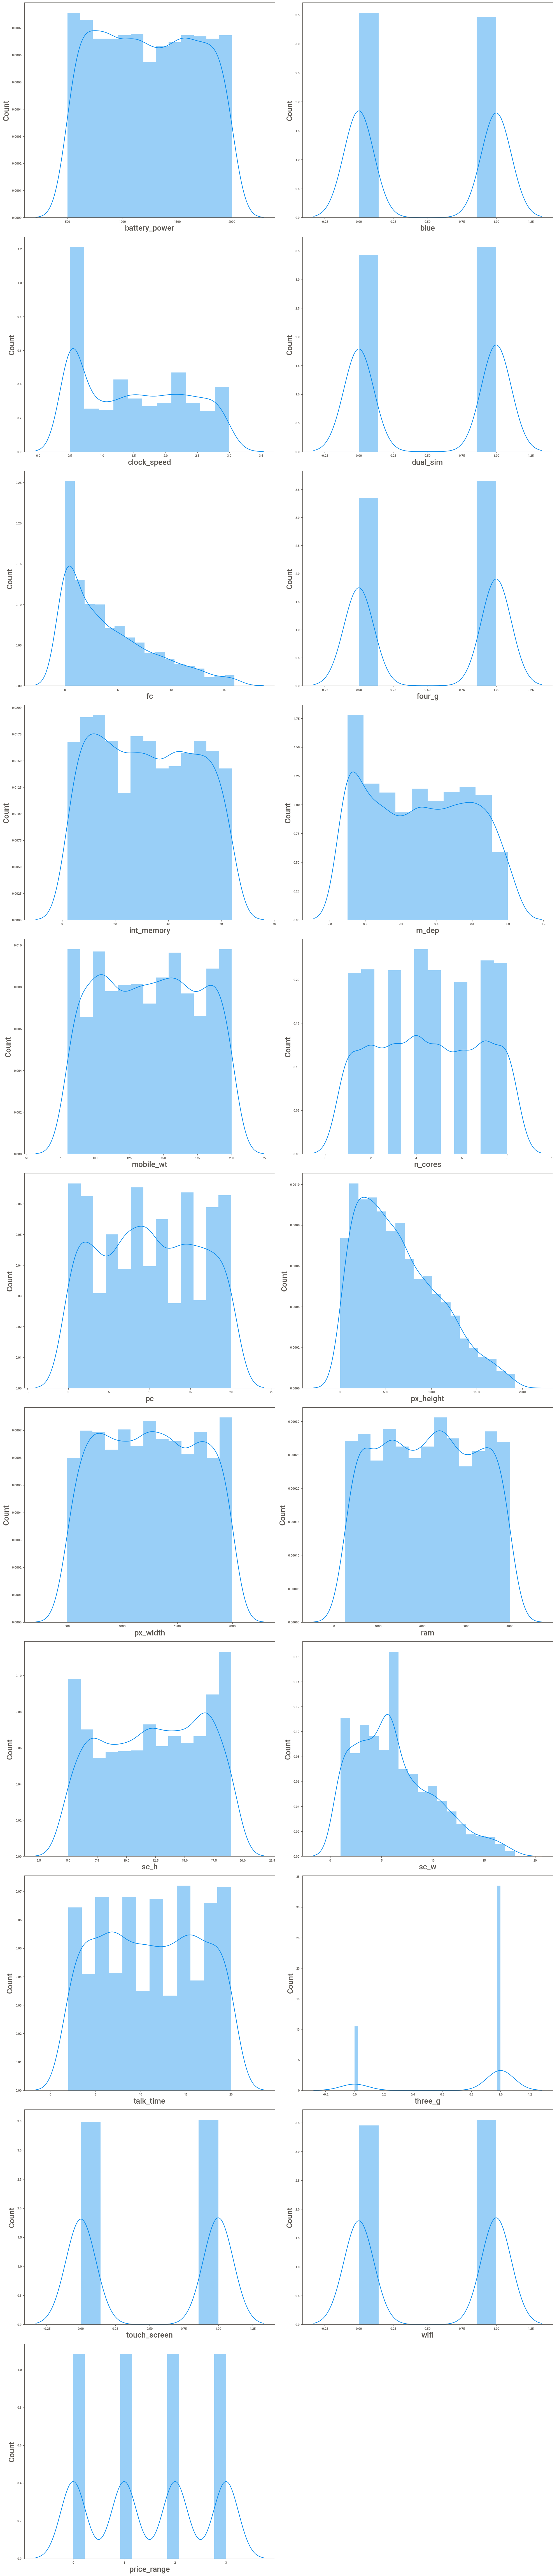

In [28]:
plt.figure(figsize=(20,100), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in df:#accessing the columns 
    if plotnumber<=24 :
        ax = plt.subplot(12,2,plotnumber)
        sns.distplot(x=df[column])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Count',fontsize = 20)
    plotnumber+=1#counter increment
plt.tight_layout()

In [29]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [30]:
df1 = df[['battery_power', 'clock_speed', 'fc', 
       'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]

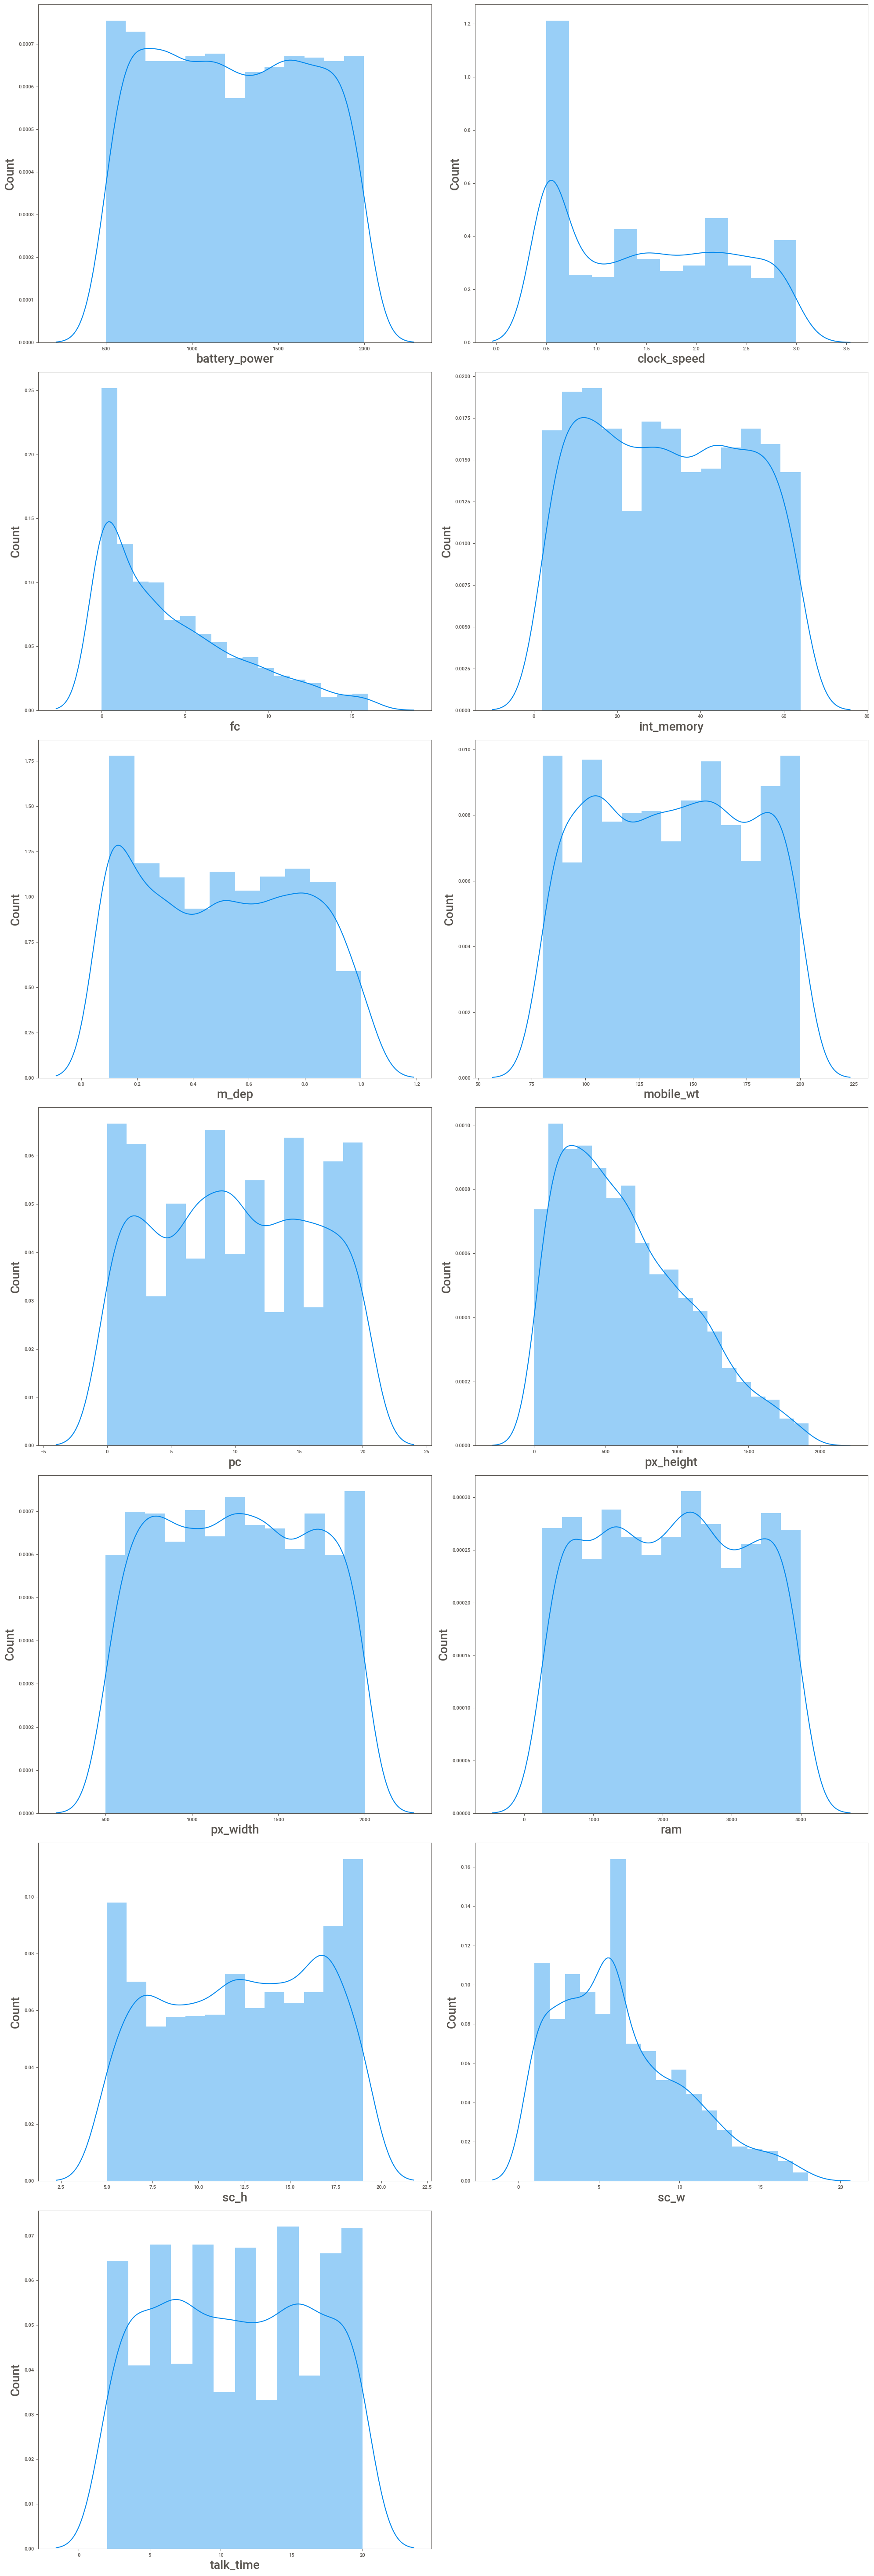

In [31]:
plt.figure(figsize=(20,100), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in df1:#accessing the columns 
    if plotnumber<=24 :
        ax = plt.subplot(12,2,plotnumber)
        sns.distplot(x=df1[column])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Count',fontsize = 20)
    plotnumber+=1#counter increment
plt.tight_layout()

######  Applying Log1p transformation


In [32]:
df1.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
       'talk_time'],
      dtype='object')

In [33]:
sc = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
       'talk_time']
for c in sc:
    df[c] = df[c].apply('log1p')

In [34]:
df.head()

battery_power  blue  clock_speed  dual_sim        fc  four_g  int_memory  \
0       6.736967     0     1.163151         0  0.693147       0    2.079442   
1       6.929517     1     0.405465         1  0.000000       1    3.988984   
2       6.335054     1     0.405465         1  1.098612       1    3.737670   
3       6.423247     1     1.252763         0  0.000000       0    2.397895   
4       7.507690     1     0.788457         0  2.639057       1    3.806662   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width       ram      sc_h  \
0  0.470004   5.241747        2  ...   3.044522  6.629363  7.843849  2.302585   
1  0.530628   4.919981        3  ...   6.809039  7.595387  7.875499  2.890372   
2  0.641854   4.983607        5  ...   7.142037  7.448334  7.864804  2.484907   
3  0.587787   4.882802        6  ...   7.104144  7.488294  7.926603  2.833213   
4  0.470004   4.955827        2  ...   7.097549  7.100852  7.252762  2.197225   

       sc_w  talk_time  three_g  touch_screen  wifi  price_range  
0  2.079442   2.995732        0             0     1            1  
1  1.386294   2.079442        1             1     0            2  
2  1.098612   2.302585        1             1     0            2  
3  2.197225   2.484907        1             0     0            2  
4  1.098612   2.772589        1             1     0            1  

[5 rows x 21 columns]

In [35]:
df2 =df[['battery_power', 'clock_speed', 'fc', 
       'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]

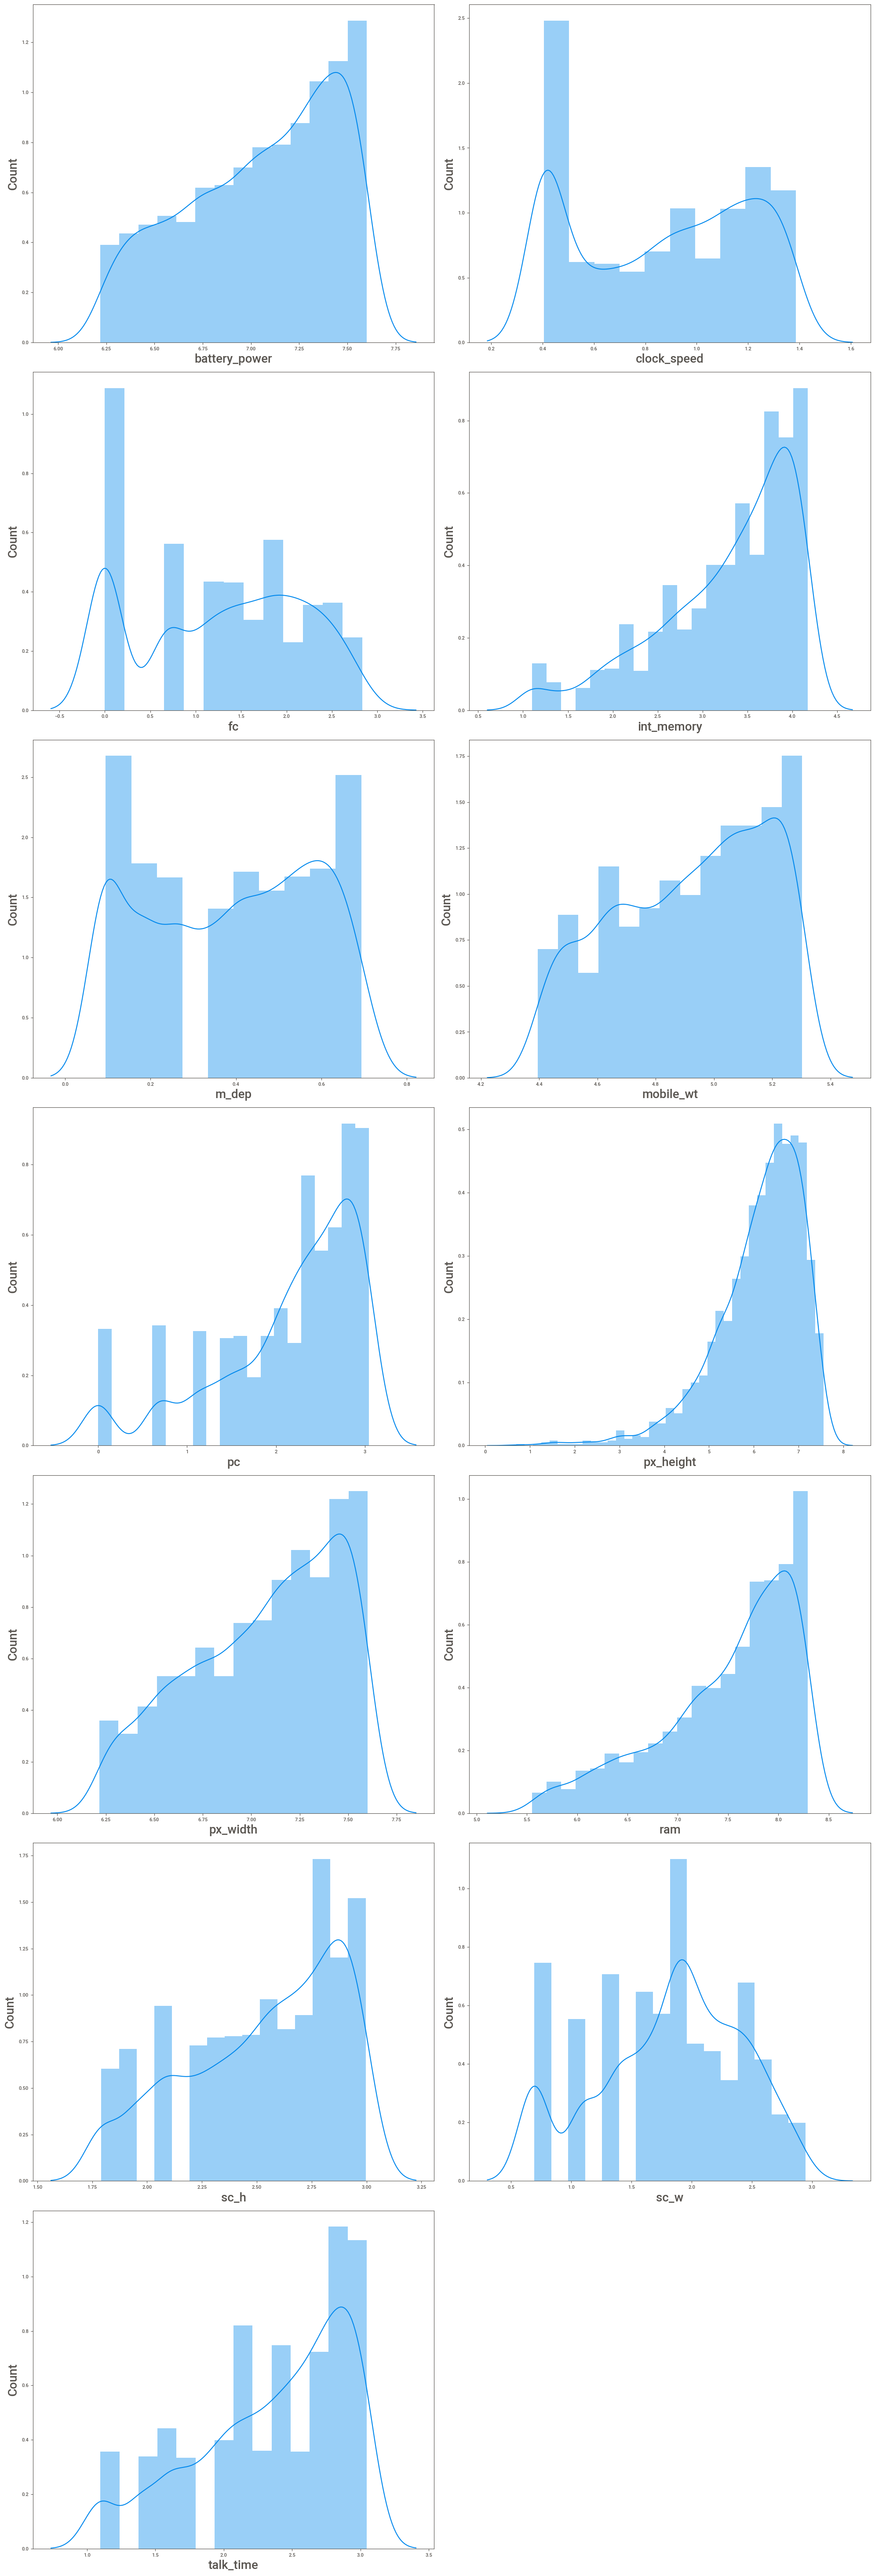

In [36]:
plt.figure(figsize=(20,100), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in df2:#accessing the columns 
    if plotnumber<=24 :
        ax = plt.subplot(12,2,plotnumber)
        sns.distplot(x=df2[column])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Count',fontsize = 20)
    plotnumber+=1#counter increment
plt.tight_layout()

######  The skewness have been reduced to the utmost.


### Feature Selection

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [38]:
X = df.drop('price_range', axis = 1)
X

battery_power  blue  clock_speed  dual_sim        fc  four_g  \
0          6.736967     0     1.163151         0  0.693147       0   
1          6.929517     1     0.405465         1  0.000000       1   
2          6.335054     1     0.405465         1  1.098612       1   
3          6.423247     1     1.252763         0  0.000000       0   
4          7.507690     1     0.788457         0  2.639057       1   
...             ...   ...          ...       ...       ...     ...   
1995       6.678342     1     0.405465         1  0.000000       1   
1996       7.583756     1     1.280934         1  0.000000       0   
1997       7.555905     0     0.641854         1  0.693147       1   
1998       7.321850     0     0.641854         0  1.609438       1   
1999       6.236370     1     1.098612         1  1.791759       1   

      int_memory     m_dep  mobile_wt  n_cores        pc  px_height  px_width  \
0       2.079442  0.470004   5.241747        2  1.098612   3.044522  6.629363   
1       3.988984  0.530628   4.919981        3  1.945910   6.809039  7.595387   
2       3.737670  0.641854   4.983607        5  1.945910   7.142037  7.448334   
3       2.397895  0.587787   4.882802        6  2.302585   7.104144  7.488294   
4       3.806662  0.470004   4.955827        2  2.708050   7.097549  7.100852   
...          ...       ...        ...      ...       ...        ...       ...   
1995    1.098612  0.587787   4.672829        6  2.708050   7.109062  7.544861   
1996    3.688879  0.182322   5.236442        4  1.386294   6.820016  7.583756   
1997    3.610918  0.530628   4.691348        8  1.386294   6.767343  7.398174   
1998    3.850148  0.095310   4.983607        5  1.791759   5.820083  6.508769   
1999    3.828641  0.641854   5.129899        6  2.833213   6.182085  6.626718   

           ram      sc_h      sc_w  talk_time  three_g  touch_screen  wifi  
0     7.843849  2.302585  2.079442   2.995732        0             0     1  
1     7.875499  2.890372  1.386294   2.079442        1             1     0  
2     7.864804  2.484907  1.098612   2.302585        1             1     0  
3     7.926603  2.833213  2.197225   2.484907        1             0     0  
4     7.252762  2.197225  1.098612   2.772589        1             1     0  
...        ...       ...       ...        ...      ...           ...   ...  
1995  6.505784  2.639057  1.609438   2.995732        1             1     0  
1996  7.617268  2.484907  2.397895   2.833213        1             1     1  
1997  8.025516  2.302585  0.693147   1.791759        1             1     0  
1998  6.768493  2.944439  2.397895   2.995732        1             1     1  
1999  8.273847  2.995732  1.609438   1.098612        1             1     1  

[2000 rows x 20 columns]

In [39]:
y = df.price_range

In [40]:
sel_ = SelectFromModel(RandomForestClassifier(n_estimators=100))
sel_.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier())

In [41]:
selected_feat = X.columns[(sel_.get_support())]
selected_feat

Index(['battery_power', 'px_height', 'px_width', 'ram'], dtype='object')

In [42]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X,y)

RandomForestClassifier()

In [43]:
pd.DataFrame(model.feature_importances_, index=X.columns).sort_values(0, ascending=False)

0
ram            0.499881
battery_power  0.075114
px_height      0.055092
px_width       0.054446
mobile_wt      0.036460
int_memory     0.035066
pc             0.027983
talk_time      0.027426
sc_h           0.027252
clock_speed    0.027001
sc_w           0.026787
fc             0.023406
m_dep          0.023376
n_cores        0.022480
touch_screen   0.006829
four_g         0.006806
blue           0.006594
wifi           0.006396
dual_sim       0.006169
three_g        0.005436

### Scaling


In [44]:
A = df[['ram','battery_power','px_height','px_width','mobile_wt','int_memory','talk_time','sc_w','pc','sc_h','clock_speed']]

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_new = sc.fit_transform(A)

### Model Building

In [46]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(multi_class = 'ovr') # one verses rest

In [47]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_new,y,random_state = 3)

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report

LogisticRegression(multi_class='ovr')
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       380
           1       0.78      0.61      0.69       368
           2       0.72      0.73      0.73       383
           3       0.89      0.98      0.93       369

    accuracy                           0.83      1500
   macro avg       0.82      0.83      0.82      1500
weighted avg       0.82      0.83      0.82      1500

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       120
           1       0.78      0.61      0.68       132
           2       0.69      0.77      0.73       117
           3       0.95      0.97      0.96       131

    accuracy                           0.83       500
   macro avg       0.82      0.83      0.82       500


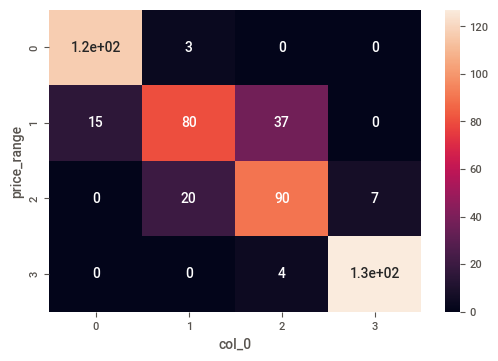

In [50]:
LR = LogisticRegression(multi_class = 'ovr')
LR.fit(x_train, y_train)
y_train_LR = LR.predict(x_train)
y_test_LR = LR.predict(x_test)

print(LR)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_LR))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_LR))


print('Confusion matrix')
print('-------------------------------------------------------')
print(sns.heatmap(pd.crosstab(y_test,y_test_LR),annot = True))

### Logistic Regression:
### Accuracy:
###                   Training score: 83% 
###                   Test score: 83%
                                    


### SVC 

In [51]:
from imblearn.over_sampling import SMOTE
sm  = SMOTE()

In [52]:
xs,ys=sm.fit_resample(x_new,y)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(xs, ys, test_size=0.25, random_state=123)

SVC()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       381
           1       0.96      0.95      0.95       372
           2       0.93      0.94      0.94       363
           3       0.97      0.97      0.97       384

    accuracy                           0.96      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.96      0.96      0.96      1500

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       119
           1       0.87      0.84      0.85       128
           2       0.79      0.91      0.85       137
           3       0.94      0.86      0.90       116

    accuracy                           0.88       500
   macro avg       0.89      0.88      0.89       500
weighted avg       0.89      0.8

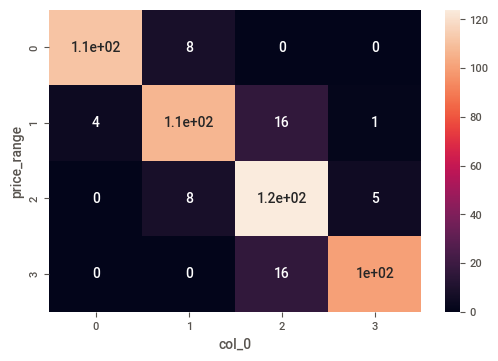

In [55]:
svc = SVC()
svc.fit(x_train, y_train)
y_train_svc = svc.predict(x_train)
y_test_svc = svc.predict(x_test)

print(svc)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_svc))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_svc))


print('Confusion matrix')
print('-------------------------------------------------------')
print(sns.heatmap(pd.crosstab(y_test, y_test_svc), annot = True))

### Support VectorClassifier:
### Accuracy:
###                   Training score: 96% 
###                   Test score: 88%
                                    

### Random Forest Classifier

In [56]:
x_sm,y_sm=sm.fit_resample(A,y)  # fitting into SMOTE

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.25, random_state=123)

RandomForestClassifier()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       381
           1       1.00      1.00      1.00       372
           2       1.00      1.00      1.00       363
           3       1.00      1.00      1.00       384

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       119
           1       0.90      0.87      0.88       128
           2       0.86      0.85      0.85       137
           3       0.91      0.91      0.91       116

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg 

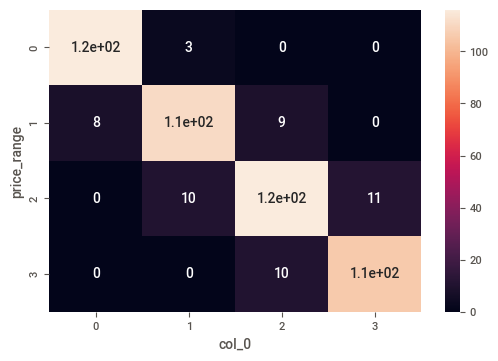

In [58]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train, y_train)
y_train_rf = rf.predict(x_train)
y_test_rf = rf.predict(x_test)

print(rf)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_rf))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_rf))


print('Confusion matrix')
print('-------------------------------------------------------')
print(sns.heatmap(pd.crosstab(y_test, y_test_rf), annot = True))

### Random Forest Classifier:
### Accuracy:
###                   Training score: 100% 
###                   Test score: 90%
                                    

In [59]:
from sklearn.model_selection import cross_val_score

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       381
           1       1.00      1.00      1.00       372
           2       1.00      1.00      1.00       

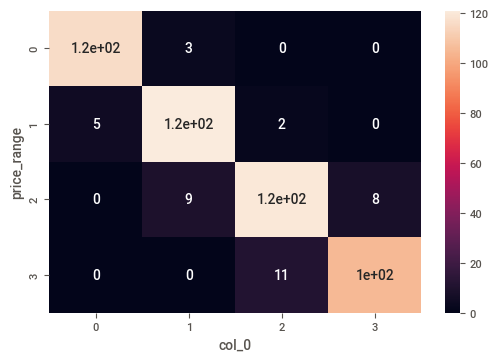

In [60]:
xg = XGBClassifier()
xg.fit(x_train, y_train)
y_train_xg = xg.predict(x_train)
y_test_xg = xg.predict(x_test)

print(xg)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_xg))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_xg))

print('Confusion matrix')
print('-------------------------------------------------------')
print(sns.heatmap(pd.crosstab(y_test, y_test_xg),annot = True))

### XGB Classifier:
### Accuracy:
###                   Training score: 100% 
###                   Test score: 92%
                                    

###  Hyper Parameter Tuning

### Random forest


In [62]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [63]:
rf_clf1 = RandomForestClassifier(random_state=123)
rf_cv = RandomizedSearchCV(estimator = rf_clf1, scoring = 'precision', param_distributions = random_grid, n_iter = 100, cv = 3,verbose = 2, random_state = 123, n_jobs = -1)

In [64]:
rf_cv.fit(x_train,y_train)
rf_best_params = rf_cv.best_params_
print('best parameters: ', rf_best_params)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
best parameters:  {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


RandomForestClassifier(bootstrap=False, max_depth=10, n_estimators=600)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       381
           1       1.00      1.00      1.00       372
           2       1.00      1.00      1.00       363
           3       1.00      1.00      1.00       384

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       119
           1       0.88      0.88      0.88       128
           2       0.85      0.82      0.84       137
           3       0.90      0.91      0.90       116

    accuracy                           0.89       500
   macro avg       0

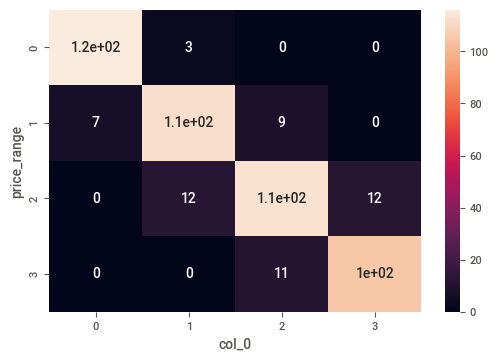

In [65]:
rf = RandomForestClassifier(n_estimators = 600, min_samples_split= 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 10, bootstrap = False)
rf.fit(x_train, y_train)
y_train_rf = rf.predict(x_train)
y_test_rf = rf.predict(x_test)

print(rf)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_rf))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_rf))


print('Confusion matrix')
print('-------------------------------------------------------')
print(sns.heatmap(pd.crosstab(y_test, y_test_rf), annot = True))

### Random Forest:
### Accuracy:
###                   Training score: 100% 
###                   Test score: 89%
                                    

In [76]:
# XGB classifier

In [77]:
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='precision',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
                               
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
rcv.fit(x_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")#

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 1.6, 'reg_alpha': 12.8, 'n_estimators': 50, 'max_depth': 8, 'learning_rate': 0.6, 'gamma': 0})


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.6, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=12.8, ...)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       381
           1       0.91      0.94      0.93       372
           2       0.93      0.90      0.92       363
  

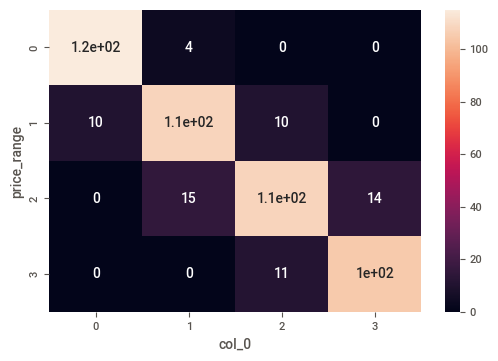

In [78]:
xg = XGBClassifier(reg_lambda = 1.6, reg_alpha = 12.8, n_estimators = 50, max_depth = 8, learning_rate = 0.6, gamma = 0)
xg.fit(x_train, y_train)
y_train_xg = xg.predict(x_train)
y_test_xg = xg.predict(x_test)

print(xg)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_xg))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_xg))



print('Confusion matrix')
print('-------------------------------------------------------')
print(sns.heatmap(pd.crosstab(y_test, y_test_xg),annot = True))

### XGB Classifier:
### Accuracy:
###                   Training score: 95% 
###                   Test score: 87%
                                    

### The model which we got the best accuracy is Random Forest Classifier with training score 100% and test score of 89%.
### Hence, this model is ready for deployement.
